# Обробка та аналіз БМД

Лабораторна робота №4

Виконав студент групи БС-81

Лукашевич Максим

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [17]:
data_arr = pd.DataFrame({
    'norm1': np.random.randn(20),
    'norm2':np.random.standard_normal(size = 20),
    'norm3':np.random.normal(loc = 10, scale = 3, size = 20),
    'pois':np.random.poisson(lam = 5, size = 20),
    'exp':np.random.exponential(scale = 1, size = 20),
    'unif':np.random.uniform(size = 20)
})
data_arr

,norm1,norm2,norm3,pois,exp,unif
0,-1.169687,-0.078474,13.510259,6,1.985586,0.075102
1,-0.053391,-0.105409,7.569426,4,1.128202,0.561457
2,-3.184733,-0.850049,13.682108,9,0.754655,0.734514
3,-0.601137,0.134495,8.862434,3,0.403404,0.253564
4,0.529643,-0.283160,12.767034,2,0.746475,0.313369
5,-1.174597,1.941255,6.705382,6,0.147488,0.355097
6,0.391300,0.176413,11.955387,7,0.136541,0.997811
7,0.428428,2.043931,12.148415,5,0.042383,0.213707
8,-1.142646,0.837200,11.041487,3,0.605301,0.138344
9,-0.576925,0.336685,8.289557,4,0.566180,0.987825


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.

In [18]:
data_arr = pd.DataFrame({key: sorted(values) for key, values in data_arr.transpose().iterrows()})

1.

In [19]:
def data_mean(arr,n):
    all_data = 0
    for i in range(n):
        all_data += arr[i]
    return all_data/n
data_mean_value = {i: data_mean(data_arr[i], 20) for i in data_arr}

2.

In [20]:
def data_squared(arr,n, dat_mean):
    s = 0
    for i in range(n):
        s += ((arr[i]-dat_mean)**2)
    return s
data_squared_value = {i: data_squared(data_arr[i], 20, data_mean_value[i]) for i in data_arr}

3.

In [21]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def b(arr, n):
    B = 0
    for i in range(n//2):
        B += (a[i]*(arr[(n-1)-i] - arr[i]))
    return B

b_value = {i: b(data_arr[i], 20) for i in data_arr}
def W (squared, b):
    return (b**2)/squared

W_value = {i: W(b_value[i],data_squared_value[i]) for i in data_arr}

WTheory = sts.shapiro(data_arr['norm1'])
W_value, WTheory

({'norm1': 100.08584794934397,
  'norm2': 63.907662922358384,
  'norm3': 3223.4538572747742,
  'pois': 839.0208861655001,
  'exp': 33.927908170678954,
  'unif': 1.763727510382675},
 (0.886806845664978, 0.02350335195660591))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. 

In [22]:
headers = ['Variable', 'Statistics', 'Distribution']
new_table = pd.DataFrame(columns = headers)
new_table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [23]:
new_table["Variable"] = data_arr.keys()
new_table

,Variable,Statistics,Distribution
0,norm1,NaN,NaN
1,norm2,NaN,NaN
2,norm3,NaN,NaN
3,pois,NaN,NaN
4,exp,NaN,NaN
5,unif,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [24]:
new_table["Distribution"] = [('normal' if 'norm' in i else 'non-normal') for i in new_table["Variable"]]
new_table

,Variable,Statistics,Distribution
0,norm1,NaN,normal
1,norm2,NaN,normal
2,norm3,NaN,normal
3,pois,NaN,non-normal
4,exp,NaN,non-normal
5,unif,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю.

In [29]:
for i in range (new_table.shape[0]):
    norm = new_table["Variable"][i]
    if 'norm' in norm:
        new_table["Statistics"][i] = f"{data_arr[norm].mean()} [ {data_arr[norm].std()} ]"
new_table

,Variable,Statistics,Distribution
0,norm1,-0.20127628439311523 [ 1.0440428592247892 ],normal
1,norm2,0.4467403695294653 [ 0.9113867935925384 ],normal
2,norm3,9.668227633849758 [ 3.3617386047604727 ],normal
3,pois,NaN,non-normal
4,exp,NaN,non-normal
5,unif,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. 

In [32]:
for i in range (new_table.shape[0]):
    non_normal = new_table["Variable"][i]
    if 'normal'not in non_normal:
        new_table["Statistics"][i] = f"{data_arr[non_normal].median()} \
        [{data_arr[non_normal].quantile(0.25)}; {data_arr[non_normal].quantile(0.75)}]"

new_table

,Variable,Statistics,Distribution
0,norm1,0.11822879152865491 [-0.73651430496177...,normal
1,norm2,0.25654890131410585 [-0.12184878270785...,normal
2,norm3,8.973721754970738 [7.12170463198536; 1...,normal
3,pois,5.0 [3.0; 6.0],non-normal
4,exp,0.7414616257627608 [0.3394251947452232...,non-normal
5,unif,0.38103129693614723 [0.298417845702442...,non-normal


8. Зберегти таблицю в пдф форматі

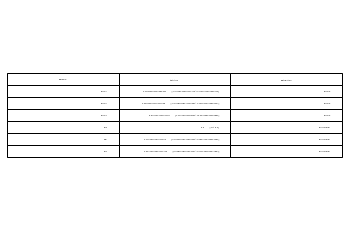

In [34]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_table)):
    cell_text.append(new_table.iloc[row])

ax.table(cellText=cell_text, colLabels=new_table.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()